# PPKE - Mesterséges intelligencia alkalmazásai (2023/24)
#### Békési Lilla
#### Adatelemzési munkákkal kapcsolatos elemzés kódja

Adatok beolvasása

In [18]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('jobs_in_data.csv')

# Display the first few rows of the DataFrame and the column names to understand the content
df.head(), df.columns

(   work_year             job_title                    job_category  \
 0       2023  Data DevOps Engineer                Data Engineering   
 1       2023        Data Architect  Data Architecture and Modeling   
 2       2023        Data Architect  Data Architecture and Modeling   
 3       2023        Data Scientist       Data Science and Research   
 4       2023        Data Scientist       Data Science and Research   
 
   salary_currency  salary  salary_in_usd employee_residence experience_level  \
 0             EUR   88000          95012            Germany        Mid-level   
 1             USD  186000         186000      United States           Senior   
 2             USD   81800          81800      United States           Senior   
 3             USD  212000         212000      United States           Senior   
 4             USD   93300          93300      United States           Senior   
 
   employment_type work_setting company_location company_size  
 0       Full-time  

Hiányzó adatok és inkonzisztenciák keresése

In [19]:
# Check for missing data and any inconsistencies such as data types or unexpected values
missing_data = df.isnull().sum()
data_types = df.dtypes
unique_values = {column: df[column].unique() for column in df.columns}

missing_data, data_types, unique_values

(work_year             0
 job_title             0
 job_category          0
 salary_currency       0
 salary                0
 salary_in_usd         0
 employee_residence    0
 experience_level      0
 employment_type       0
 work_setting          0
 company_location      0
 company_size          0
 dtype: int64,
 work_year              int64
 job_title             object
 job_category          object
 salary_currency       object
 salary                 int64
 salary_in_usd          int64
 employee_residence    object
 experience_level      object
 employment_type       object
 work_setting          object
 company_location      object
 company_size          object
 dtype: object,
 {'work_year': array([2023, 2022, 2020, 2021], dtype=int64),
  'job_title': array(['Data DevOps Engineer', 'Data Architect', 'Data Scientist',
         'Machine Learning Researcher', 'Data Engineer',
         'Machine Learning Engineer', 'Data Analyst', 'Analytics Engineer',
         'Applied Scientist', 'BI

Kiválasztott változók korrelációi

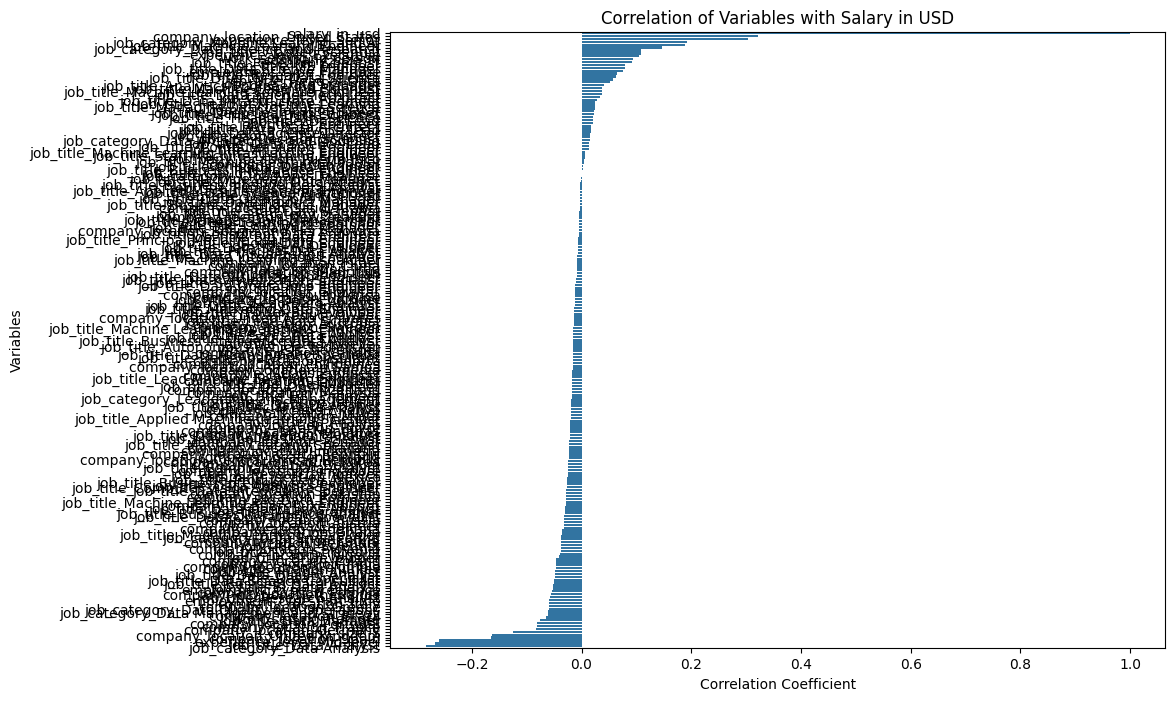

salary_in_usd                           1.000000
company_location_United States          0.320795
experience_level_Senior                 0.303894
job_category_Machine Learning and AI    0.192326
job_title_Machine Learning Engineer     0.187905
                                          ...   
company_location_United Kingdom        -0.162969
company_location_Spain                 -0.165179
experience_level_Mid-level             -0.259234
job_title_Data Analyst                 -0.266847
job_category_Data Analysis             -0.284148
Name: salary_in_usd, Length: 213, dtype: float64

In [20]:
# Első vizualizáció

import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical variables into dummy variables for correlation analysis
df_encoded = pd.get_dummies(df[['job_title', 'job_category', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size', 'salary_in_usd']], drop_first=True)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract correlations of 'salary_in_usd' with other variables
salary_correlations = correlation_matrix['salary_in_usd'].sort_values(ascending=False)

# Plot the correlations with salary in USD
plt.figure(figsize=(10, 8))
sns.barplot(y=salary_correlations.index, x=salary_correlations.values)
plt.title('Correlation of Variables with Salary in USD')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

salary_correlations

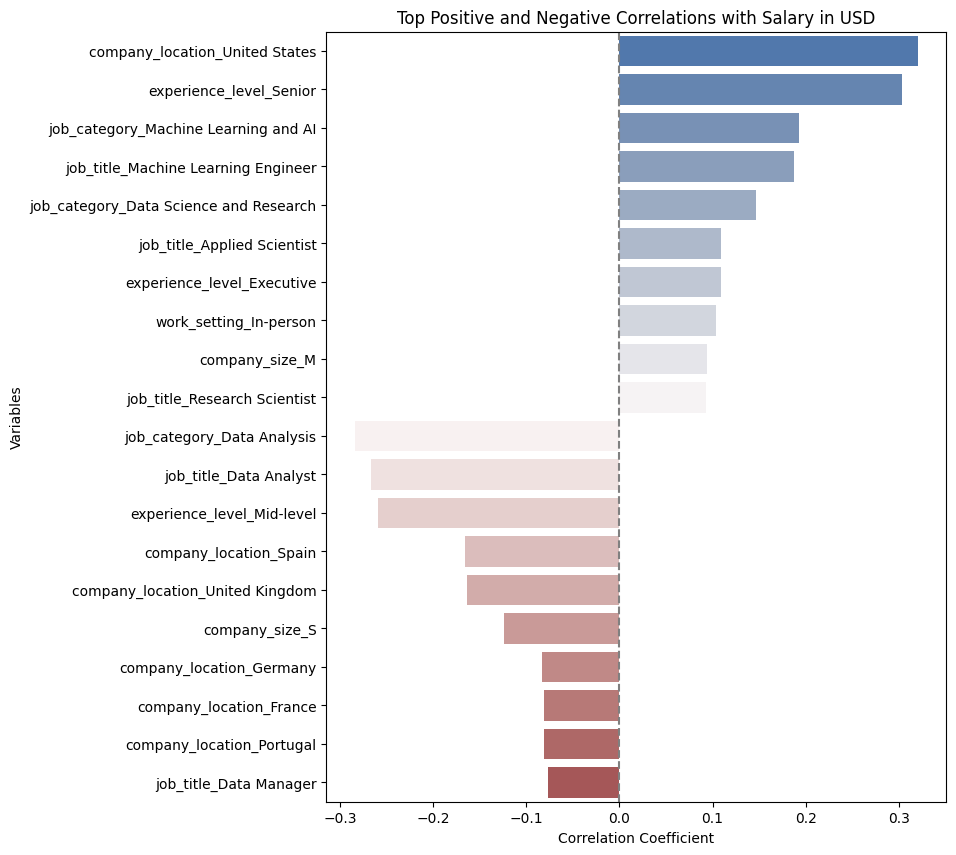

In [21]:
# Második vizualizáció

# Filter for top 10 positive and negative correlations for better visualization clarity
top_positive = salary_correlations.drop('salary_in_usd').nlargest(10)
top_negative = salary_correlations.drop('salary_in_usd').nsmallest(10)

# Combine top positive and negative for a concise plot
top_correlations = pd.concat([top_positive, top_negative])

# Plot the top correlations with salary in USD
plt.figure(figsize=(8, 10))
sns.barplot(x=top_correlations.values, y=top_correlations.index, palette="vlag")
plt.title('Top Positive and Negative Correlations with Salary in USD')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

Túl sok kategóriával rendelkező változók transzformációja

In [22]:
# Feature engineering for Job Title, Company Location, and Job Category

# Simplifying Job Titles by extracting key roles
key_roles = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning', 'Architect', 'Scientist', 'Engineer']
def simplify_job_title(title):
    for role in key_roles:
        if role in title:
            return role
    return 'Other'

df['simplified_job_title'] = df['job_title'].apply(simplify_job_title)

# Grouping Company Locations into regions
regions = {
    'North America': ['United States', 'Canada'],
    'Europe': ['Germany', 'United Kingdom', 'France', 'Spain', 'Netherlands', 'Ireland', 'Switzerland', 'Italy', 'Sweden', 'Poland', 'Belgium', 'Austria', 'Finland', 'Denmark', 'Norway', 'Portugal', 'Czech Republic', 'Romania', 'Ukraine', 'Greece', 'Hungary', 'Bulgaria', 'Serbia', 'Slovakia', 'Lithuania', 'Latvia', 'Estonia'],
    'Asia': ['India', 'China', 'Japan', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Thailand', 'Vietnam', 'Indonesia', 'Pakistan', 'Kazakhstan'],
    'South America': ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Ecuador', 'Bolivia'],
    'Middle East': ['Israel', 'United Arab Emirates', 'Turkey', 'Saudi Arabia', 'Qatar', 'Kuwait', 'Jordan'],
    'Africa': ['South Africa', 'Nigeria', 'Kenya', 'Egypt', 'Morocco'],
    'Oceania': ['Australia', 'New Zealand'],
    'Other': ['Other']
}

def map_region(location):
    for region, countries in regions.items():
        if location in countries:
            return region
    return 'Other'

df['region'] = df['company_location'].apply(map_region)

# Simplifying Job Categories by grouping less common categories
common_categories = ['Data Science and Research', 'Data Engineering', 'Data Analysis']
def simplify_category(category):
    if category in common_categories:
        return category
    else:
        return 'Other Data Roles'

df['simplified_job_category'] = df['job_category'].apply(simplify_category)

# Check the newly created variables
df[['simplified_job_title', 'region', 'simplified_job_category']].head()

,simplified_job_title,region,simplified_job_category
0,Engineer,Europe,Data Engineering
1,Architect,North America,Other Data Roles
2,Architect,North America,Other Data Roles
3,Data Scientist,North America,Data Science and Research
4,Data Scientist,North America,Data Science and Research


Prediktív modellhez használt változók vizualizációja

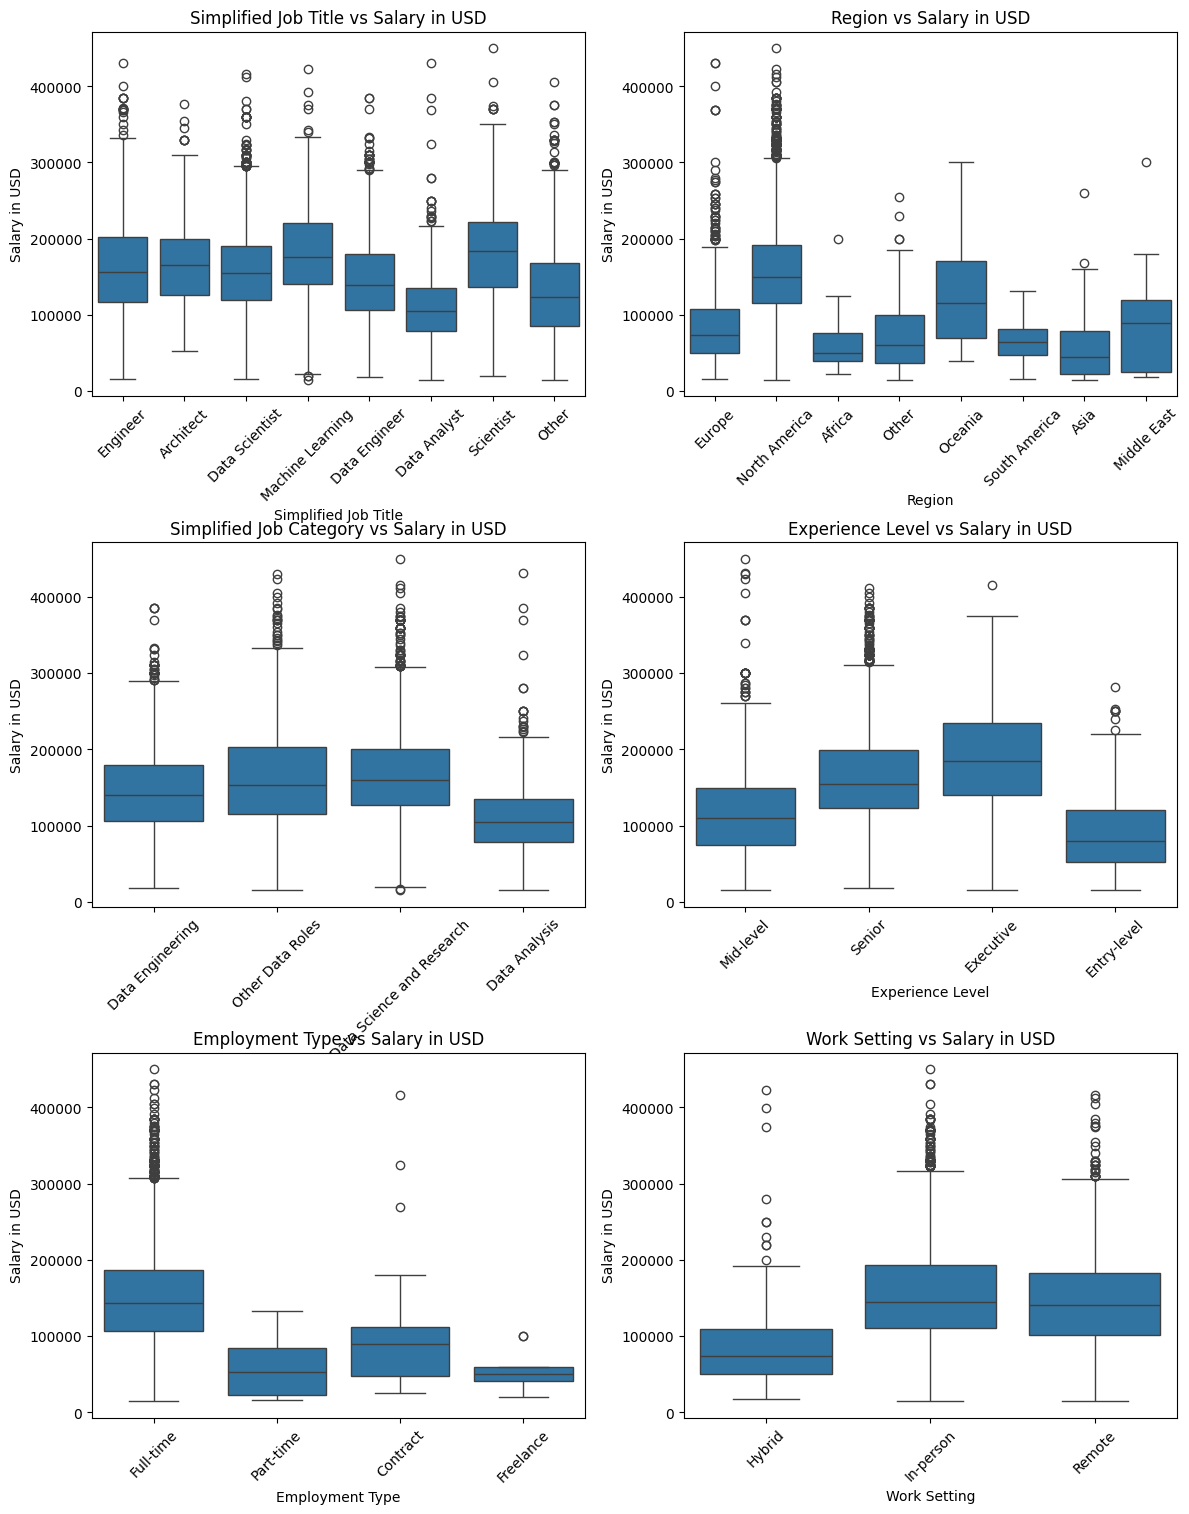

In [23]:
# Visualize the relationships between the transformed categorical variables and salary in USD using boxplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
plt.subplots_adjust(hspace=0.4)

# Boxplot for Simplified Job Title vs Salary in USD
sns.boxplot(ax=axes[0, 0], x='simplified_job_title', y='salary_in_usd', data=df)
axes[0, 0].set_title('Simplified Job Title vs Salary in USD')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 0].set_ylabel('Salary in USD')
axes[0, 0].set_xlabel('Simplified Job Title')

# Boxplot for Region vs Salary in USD
sns.boxplot(ax=axes[0, 1], x='region', y='salary_in_usd', data=df)
axes[0, 1].set_title('Region vs Salary in USD')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].set_ylabel('Salary in USD')
axes[0, 1].set_xlabel('Region')

# Boxplot for Simplified Job Category vs Salary in USD
sns.boxplot(ax=axes[1, 0], x='simplified_job_category', y='salary_in_usd', data=df)
axes[1, 0].set_title('Simplified Job Category vs Salary in USD')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].set_ylabel('Salary in USD')
axes[1, 0].set_xlabel('Simplified Job Category')

# Boxplot for Experience Level vs Salary in USD
sns.boxplot(ax=axes[1, 1], x='experience_level', y='salary_in_usd', data=df)
axes[1, 1].set_title('Experience Level vs Salary in USD')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].set_ylabel('Salary in USD')
axes[1, 1].set_xlabel('Experience Level')

# Boxplot for Employment Type vs Salary in USD
sns.boxplot(ax=axes[2, 0], x='employment_type', y='salary_in_usd', data=df)
axes[2, 0].set_title('Employment Type vs Salary in USD')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45)
axes[2, 0].set_ylabel('Salary in USD')
axes[2, 0].set_xlabel('Employment Type')

# Boxplot for Work Setting vs Salary in USD
sns.boxplot(ax=axes[2, 1], x='work_setting', y='salary_in_usd', data=df)
axes[2, 1].set_title('Work Setting vs Salary in USD')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45)
axes[2, 1].set_ylabel('Salary in USD')
axes[2, 1].set_xlabel('Work Setting')

plt.show()

Javasolt modell: random forest regression

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
data = df

# Simplify categories and encode categorical variables
# Assuming 'simplify_job_title', 'map_region', and 'simplify_category' are functions you've defined
data['simplified_job_title'] = data['job_title'].apply(simplify_job_title)
data['region'] = data['company_location'].apply(map_region)
data['simplified_job_category'] = data['job_category'].apply(simplify_category)

# Features to use in the model
features = ['simplified_job_title', 'simplified_job_category', 'experience_level', 'employment_type', 'work_setting', 'region', 'company_size']
target = 'salary_in_usd'

# Preparing the feature matrix and target vector
X = data[features]
y = data[target]

# Encoding categorical data
categorical_features = features
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot_encoder, categorical_features)
], remainder='passthrough')

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a RandomForestRegressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Creating a pipeline with preprocessing and modeling steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', random_forest_model)])

# Fitting the model
pipeline.fit(X_train, y_train)

# Predicting on test data
y_pred = pipeline.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Getting feature importances (transformed feature names are needed from the pipeline)
feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()
sorted_importances = sorted(zip(feature_names, pipeline.named_steps['regressor'].feature_importances_), key=lambda x: x[1], reverse=True)
for name, importance in sorted_importances:
    print(f"{name}: {importance}")

Mean Squared Error: 2760007916.440117
Mean Absolute Error: 40172.6449074325
R^2 Score: 0.33447877661741865
region_North America: 0.284866758677304
simplified_job_category_Data Analysis: 0.10737809253151186
simplified_job_title_Data Analyst: 0.09594303795532129
experience_level_Mid-level: 0.06879016465232417
experience_level_Entry-level: 0.053246092776261966
experience_level_Senior: 0.049973744422516175
simplified_job_title_Machine Learning: 0.04544242843097112
simplified_job_title_Other: 0.029937411751861518
experience_level_Executive: 0.026994746771765544
simplified_job_category_Data Science and Research: 0.024490318665908162
work_setting_In-person: 0.024259918909549635
work_setting_Remote: 0.022420104290411684
simplified_job_title_Scientist: 0.020903683211325727
company_size_M: 0.020026551309697358
simplified_job_category_Other Data Roles: 0.01926943113732916
company_size_L: 0.0161061372491284
simplified_job_title_Engineer: 0.014314690029985708
simplified_job_title_Data Scientist: 0.

In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: ", -grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__n_estimators': 200}
Best cross-validation score:  39219.258168857916


In [26]:
# Setting up the model with the best parameters found
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=2, random_state=42))
])

# Fitting the model
final_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_final = final_model.predict(X_test)

# Calculating the evaluation metrics on the test set
mse_final = mean_squared_error(y_test, y_pred_final)
mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"Final Mean Squared Error: {mse_final}")
print(f"Final Mean Absolute Error: {mae_final}")
print(f"Final R^2 Score: {r2_final}")

Final Mean Squared Error: 2730205628.4096885
Final Mean Absolute Error: 39947.61391891445
Final R^2 Score: 0.34166500788562204


Javasolt modell: XGBosst

In [29]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset
data = df

# Assuming the preprocessing functions and the dataset are ready to go
data['simplified_job_title'] = data['job_title'].apply(simplify_job_title)
data['region'] = data['company_location'].apply(map_region)
data['simplified_job_category'] = data['job_category'].apply(simplify_category)

# Features and target
features = ['simplified_job_title', 'simplified_job_category', 'experience_level', 'employment_type', 'work_setting', 'region', 'company_size']
target = 'salary_in_usd'

# Preparing data
X = data[features]
y = data[target]

# Encoding categorical data
categorical_features = features
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot_encoder, categorical_features)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# XGBoost model setup
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Predicting
y_pred = xgb_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Feature importances
feature_importances = xgb_model.feature_importances_
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Print feature importances
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")

Mean Squared Error: 2745831006.4028053
Mean Absolute Error: 39915.28465831273
R^2 Score: 0.3378972575774247
simplified_job_title_Architect: 0.005356978625059128
simplified_job_title_Data Analyst: 0.16199429333209991
simplified_job_title_Data Engineer: 0.012336947955191135
simplified_job_title_Data Scientist: 0.01061248779296875
simplified_job_title_Engineer: 0.005684260744601488
simplified_job_title_Machine Learning: 0.03659676015377045
simplified_job_title_Other: 0.018123039975762367
simplified_job_title_Scientist: 0.023739324882626534
simplified_job_category_Data Analysis: 0.007092147134244442
simplified_job_category_Data Engineering: 0.004577959422022104
simplified_job_category_Data Science and Research: 0.024306442588567734
simplified_job_category_Other Data Roles: 0.02290049009025097
experience_level_Entry-level: 0.03372657299041748
experience_level_Executive: 0.04978976398706436
experience_level_Mid-level: 0.056450534611940384
experience_level_Senior: 0.020561693236231804
employm

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb

# Load data and preprocess
data = df
data['simplified_job_title'] = data['job_title'].apply(simplify_job_title)
data['region'] = data['company_location'].apply(map_region)
data['simplified_job_category'] = data['job_category'].apply(simplify_category)

# Features and target
features = ['simplified_job_title', 'simplified_job_category', 'experience_level', 'employment_type', 'work_setting', 'region', 'company_size']
target = 'salary_in_usd'

X = data[features]
y = data[target]

# Encoding categorical data
categorical_features = features
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot_encoder, categorical_features)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Setting up the XGBoost model and parameter grid for RandomizedSearch
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

params = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 10, 1),
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'subsample': [0.5, 0.7, 0.9]
}

# Randomized search on hyper parameters
random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=100, scoring='neg_mean_absolute_error', cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score: ", -random_search.best_score_)

# Evaluate using the best model from random search
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {mse}")
print(f"Test Mean Absolute Error: {mae}")
print(f"Test R^2 Score: {r2}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
Best score:  39319.07595829162
Test Mean Squared Error: 2748289648.263483
Test Mean Absolute Error: 39933.948302211385
Test R^2 Score: 0.33730440480724555


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
data = df
data['simplified_job_title'] = data['job_title'].apply(simplify_job_title)
data['region'] = data['company_location'].apply(map_region)
data['simplified_job_category'] = data['job_category'].apply(simplify_category)

# Define features and target
features = ['simplified_job_title', 'simplified_job_category', 'experience_level', 'employment_type', 'work_setting', 'region', 'company_size']
target = 'salary_in_usd'

X = data[features]
y = data[target]

# Encoding categorical data
categorical_features = features
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot_encoder, categorical_features)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter space for Bayesian optimization
search_spaces = {
    'n_estimators': Integer(100, 1000),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'colsample_bytree': Real(0.3, 1.0, prior='uniform'),
    'subsample': Real(0.5, 1.0, prior='uniform')
}

# Setup the BayesSearchCV object
bayes_search = BayesSearchCV(estimator=xgb_model, search_spaces=search_spaces, n_iter=32, scoring='neg_mean_absolute_error', cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the Bayesian search
bayes_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", bayes_search.best_params_)
print("Best score: ", -bayes_search.best_score_)

# Evaluate using the best model from Bayesian search
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {mse}")
print(f"Test Mean Absolute Error: {mae}")
print(f"Test R^2 Score: {r2}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi